# Artificial Neural Net in Keras

Verifying and fine tuning parameters of ANN to be used on "Smily" dataset for classification

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import math
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras

In [2]:
def check_accuracy(y_pred, Y_test):
    

    class_tree = accuracy_score(y_pred, Y_test)

    
    print("Test accuracy: {:.2f}%".format(class_tree*100))

    confusion_matrix_1 = confusion_matrix(Y_test, y_pred)

    my_matrix = sns.heatmap(confusion_matrix_1, annot=True, cmap='Blues')
    my_matrix.set_title('Accuracy');
    my_matrix.set_xlabel('\nPredicted Values')
    my_matrix.set_ylabel('Actual Values ');
    my_matrix.xaxis.set_ticklabels(['False','True'])
    my_matrix.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Displaying the
    print(confusion_matrix(Y_test, y_pred))
    print("\n")
    print(classification_report(Y_test, y_pred))
    print(roc_auc_score(Y_test, y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()


In [3]:
X = np.load('smiley_X.npy')
Y = np.load('smiley_Y.npy')


## Data splitting

In [5]:
# Reshape X into 2D array and split into train & test sets
#X_train, X_test, Y_train, Y_test = train_test_split(np.reshape(X,(144,81)), Y,test_size=0.2,random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)


##########################################################################################
# For use in later parts which require 30% and 60% reduction in training set
##########################################################################################

# Add 30% os original training set into test set 
X_train_extract30, X_temp_extra_30, Y_train_extract30, Y_temp_extra_30 = train_test_split(X_train,Y_train ,test_size=0.3,random_state=0)

# The original training set is now reduced and held in X_train_extract30 Y_train_extract30
X_test_extra_30 = np.append(X_test, X_temp_extra_30, axis=0)
Y_test_extra_30 = np.append(Y_test, Y_temp_extra_30, axis=0)


# Add 60% os original training set into test set 
X_train_extract60, X_temp_extra_60, Y_train_extract60, Y_temp_extra_60 = train_test_split(X_train,Y_train ,test_size=0.6,random_state=0)
# The original training set is now reduced and held in X_train_extract60 Y_train_extract60
X_test_extra_60 = np.append(X_test, X_temp_extra_60, axis=0)
Y_test_extra_60 = np.append(Y_test, Y_temp_extra_60, axis=0)


In [6]:
X_train = X_train[:,:,:,0]
X_test =  X_test[:,:,:,0]
X_train.shape


(115, 9, 9)

In [8]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)
batch_size = 10
no_epochs=10
verbosity=1
learning_rate=0.01
#loss_function = sparse_categorical_crossentropy
# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
# K-fold Cross Validation model evaluation
fold_no = 1

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):
  # Define the model architecture
  #model = Sequential()
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax") ])
  # Compile the model
    opt = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])


  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1



------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
13/13 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.5504
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7442
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.9302
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.9767
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.9845
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.9845
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.9922
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3190 - accuracy: 1.0000
Epoch 10/10
13/13 [==

Score for fold 6: loss of 0.3197954595088959; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7154
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.8154
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.9000
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.9462
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.9923
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 0s

4/4 [==============================] - 0s 5ms/step




Test accuracy: 98.26%


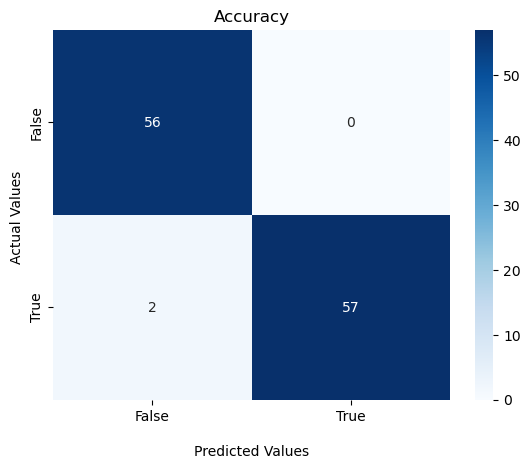

[[56  0]
 [ 2 57]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.97      0.98        59

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115

0.9830508474576272


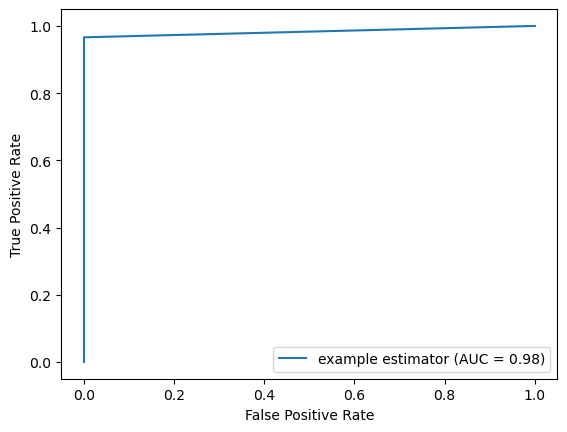

1/1 [==============================] - 0s 23ms/step




Test accuracy: 96.55%


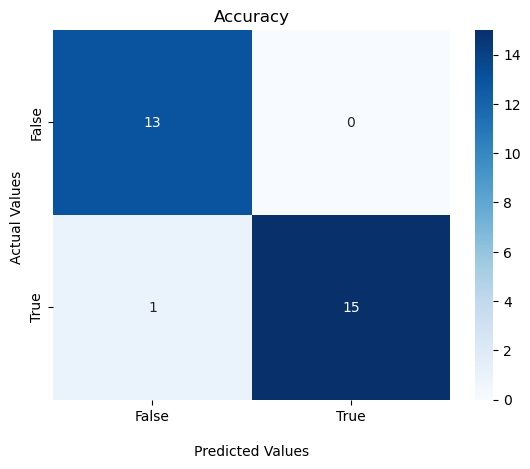

[[13  0]
 [ 1 15]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        16

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29

0.96875


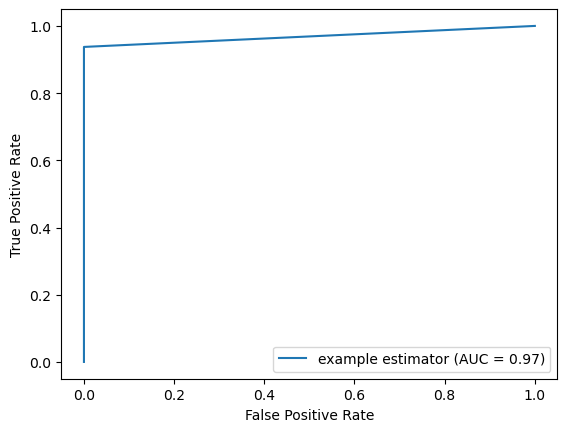

In [9]:
y_pred = np.argmax(model.predict(X_train), axis=-1)
confusion_matrix_1 = check_accuracy(Y_train, y_pred)
y_pred = np.argmax(model.predict(X_test), axis=-1)
confusion_matrix_1 = check_accuracy(Y_test, y_pred)


In [10]:
def ten_fold(learning_rate,batch_size, layer_structure, X_train,X_test, Y_train,Y_test ):
    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((Y_train, Y_test), axis=0)
    batch_size = batch_size
    no_epochs=10
    verbosity=0
    learning_rate=learning_rate
    #loss_function = sparse_categorical_crossentropy
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=10, shuffle=True)

    # K-fold Cross Validation model evaluation
    fold_no = 1
    # K-fold Cross Validation model evaluation
    fold_no = 1

    # Define per-fold score containers
    acc_per_fold = []
    loss_per_fold = []
    for train, test in kfold.split(inputs, targets):
      # Define the model architecture
      #model = Sequential()
        model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[9, 9]),
        keras.layers.Dense(layer_structure[0], activation="relu"),
        keras.layers.Dense(layer_structure[1], activation="relu"),
        keras.layers.Dense(layer_structure[2], activation="softmax") ])
      # Compile the model
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
        model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])


      # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

      # Fit data to model
        history = model.fit(inputs[train], targets[train],
                  batch_size=batch_size,
                  epochs=no_epochs,
                  verbose=verbosity)

      # Generate generalization metrics
        scores = model.evaluate(inputs[test], targets[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

      # Increase fold number
        fold_no = fold_no + 1
    y_pred = np.argmax(model.predict(X_train), axis=-1)
    confusion_matrix_1 = check_accuracy(Y_train, y_pred)
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    confusion_matrix_1 = check_accuracy(Y_test, y_pred)        

    return model 


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.6780346035957336; accuracy of 60.00000238418579%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.7034682035446167; accuracy of 40.00000059604645%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.6923984885215759; accuracy of 66.66666865348816%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.6815868616104126; accuracy of 40.00000059604645%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.7059873342514038; accuracy of 57.14285969734192%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.73149

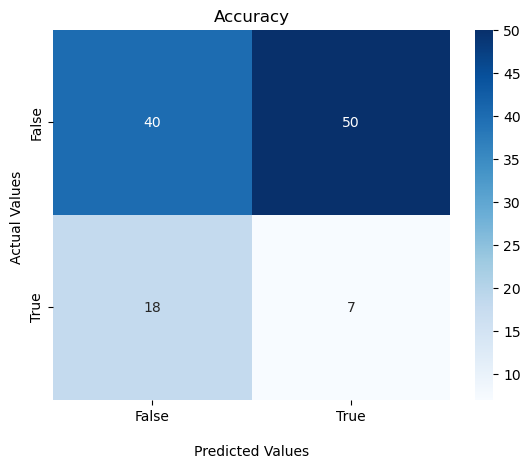

[[40 50]
 [18  7]]


              precision    recall  f1-score   support

           0       0.69      0.44      0.54        90
           1       0.12      0.28      0.17        25

    accuracy                           0.41       115
   macro avg       0.41      0.36      0.36       115
weighted avg       0.57      0.41      0.46       115

0.3622222222222222


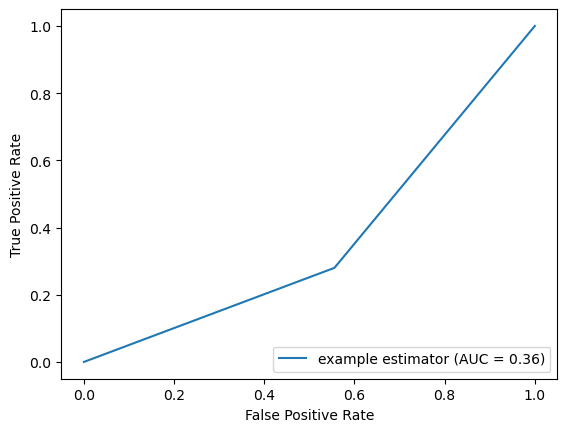

1/1 [==============================] - 0s 22ms/step




Test accuracy: 41.38%


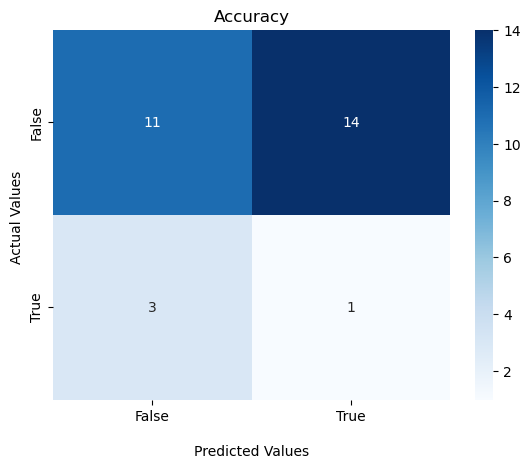

[[11 14]
 [ 3  1]]


              precision    recall  f1-score   support

           0       0.79      0.44      0.56        25
           1       0.07      0.25      0.11         4

    accuracy                           0.41        29
   macro avg       0.43      0.34      0.33        29
weighted avg       0.69      0.41      0.50        29

0.345


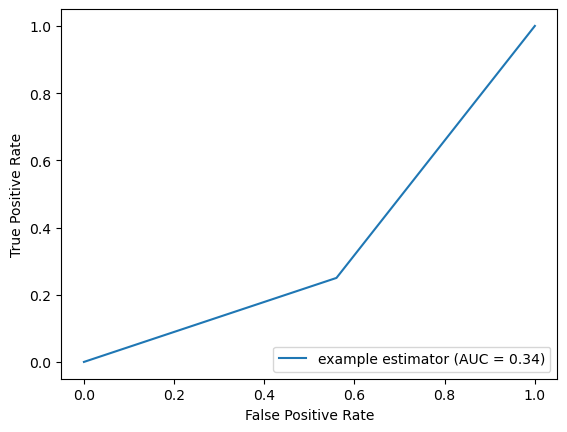

In [11]:
new_model = ten_fold(.001, 10, [5,3,2], X_train,X_test, Y_train,Y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.024832269176840782; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.06431087106466293; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.010152858681976795; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.05796201899647713; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.15129491686820984; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.07750768214464188; accuracy of 100.0%
--------------------

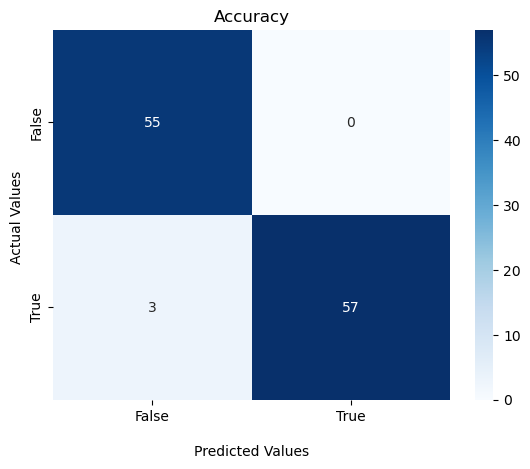

[[55  0]
 [ 3 57]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.95      0.97        60

    accuracy                           0.97       115
   macro avg       0.97      0.97      0.97       115
weighted avg       0.98      0.97      0.97       115

0.975


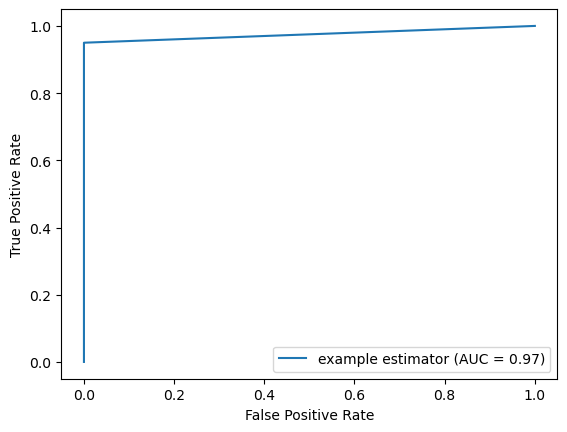

1/1 [==============================] - 0s 26ms/step




Test accuracy: 96.55%


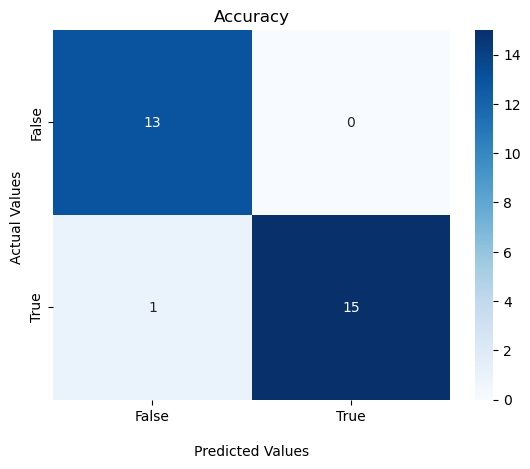

[[13  0]
 [ 1 15]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        16

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29

0.96875


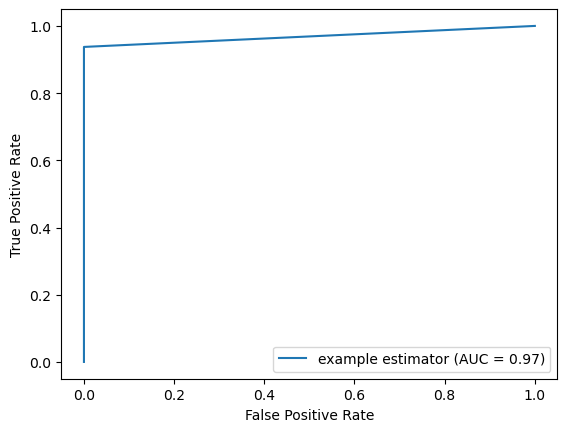

In [12]:
new_model = ten_fold(.1, 10, [5,3,2], X_train,X_test, Y_train,Y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.5923927426338196; accuracy of 86.66666746139526%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.6211881041526794; accuracy of 93.33333373069763%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.6604787111282349; accuracy of 66.66666865348816%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.6895750761032104; accuracy of 46.666666865348816%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.5995193123817444; accuracy of 71.42857313156128%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.6664

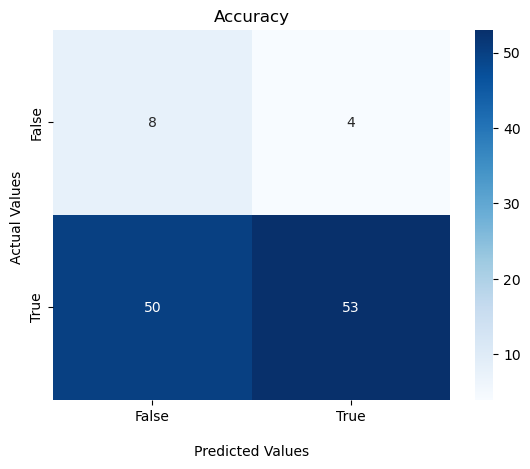

[[ 8  4]
 [50 53]]


              precision    recall  f1-score   support

           0       0.14      0.67      0.23        12
           1       0.93      0.51      0.66       103

    accuracy                           0.53       115
   macro avg       0.53      0.59      0.45       115
weighted avg       0.85      0.53      0.62       115

0.5906148867313917


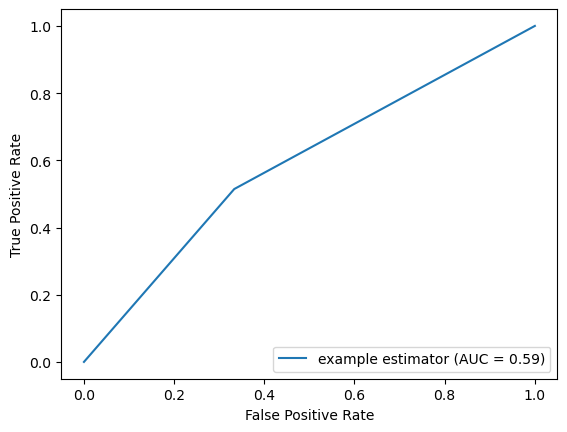

1/1 [==============================] - 0s 34ms/step




Test accuracy: 51.72%


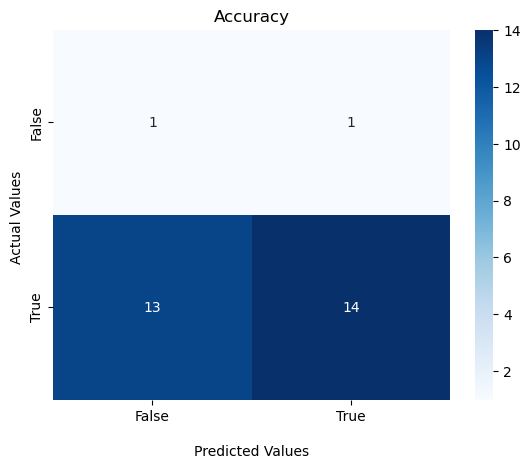

[[ 1  1]
 [13 14]]


              precision    recall  f1-score   support

           0       0.07      0.50      0.12         2
           1       0.93      0.52      0.67        27

    accuracy                           0.52        29
   macro avg       0.50      0.51      0.40        29
weighted avg       0.87      0.52      0.63        29

0.5092592592592593


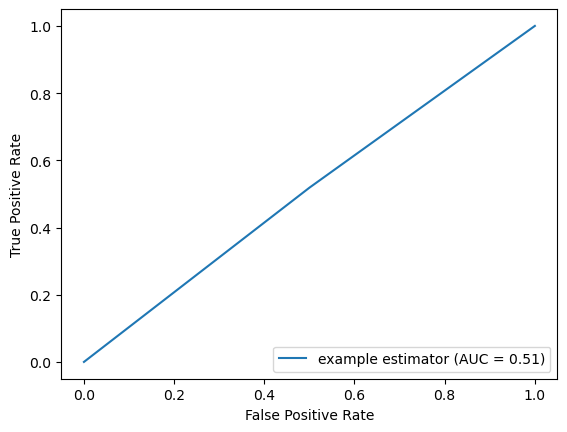

In [13]:
new_model = ten_fold(.001, 10, [100,80,2], X_train,X_test, Y_train,Y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.07968763262033463; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.017754744738340378; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.07313808053731918; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.04221995174884796; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.04014761000871658; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.0733390673995018; accuracy of 100.0%
----------------------

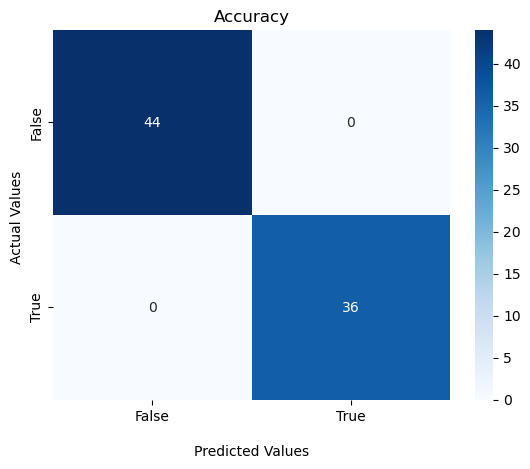

[[44  0]
 [ 0 36]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0


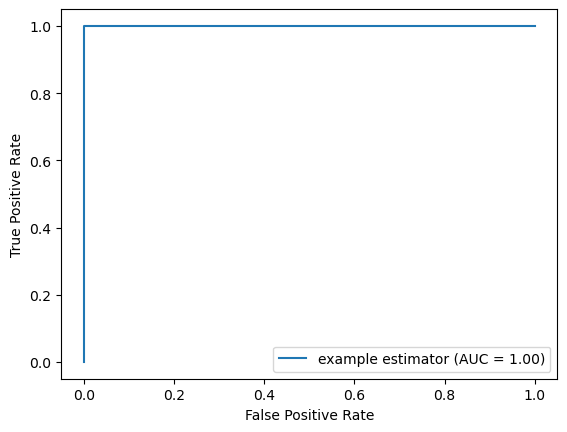

2/2 [==============================] - 0s 0s/step




Test accuracy: 100.00%


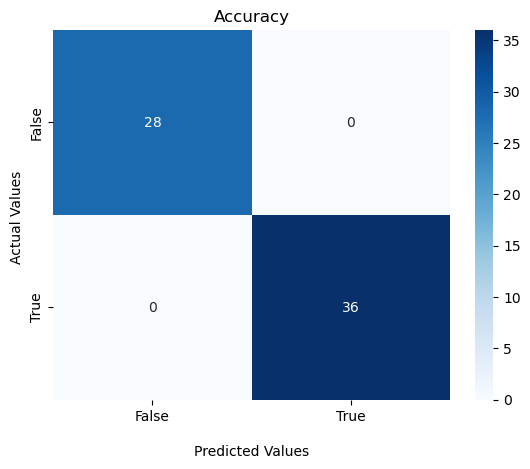

[[28  0]
 [ 0 36]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        36

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

1.0


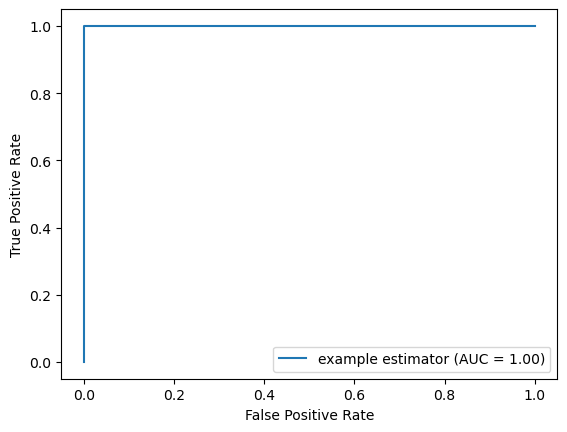

In [14]:
    new_model = ten_fold(.1, 10, [5,3,2], X_train_extract30, X_test_extra_30, Y_train_extract30, Y_test_extra_30)

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.019550921395421028; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.289689838886261; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.013447435572743416; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.041985366493463516; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.01994241587817669; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.12498760223388672; accuracy of 100.0%
---------------------

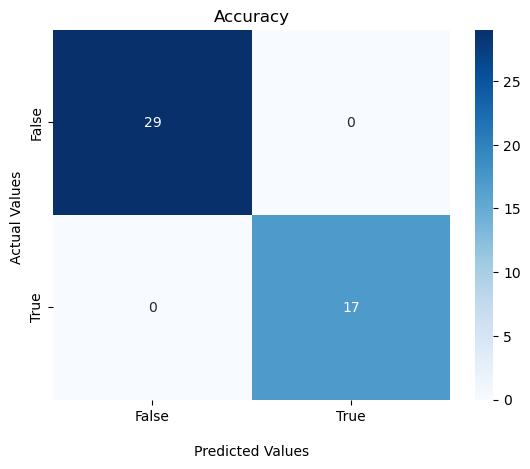

[[29  0]
 [ 0 17]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        17

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

1.0


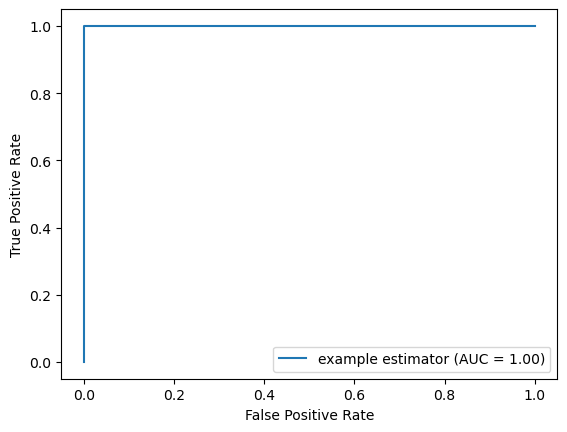

4/4 [==============================] - 0s 1ms/step




Test accuracy: 100.00%


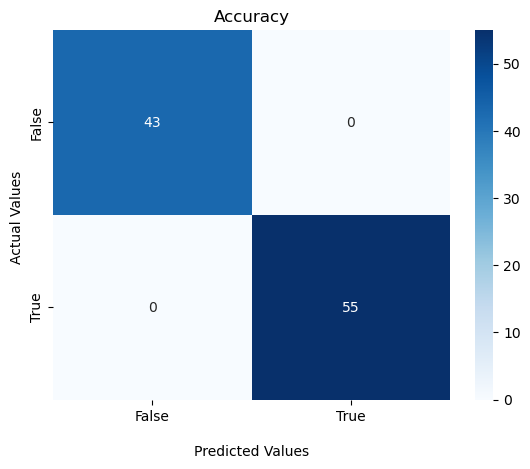

[[43  0]
 [ 0 55]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        55

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

1.0


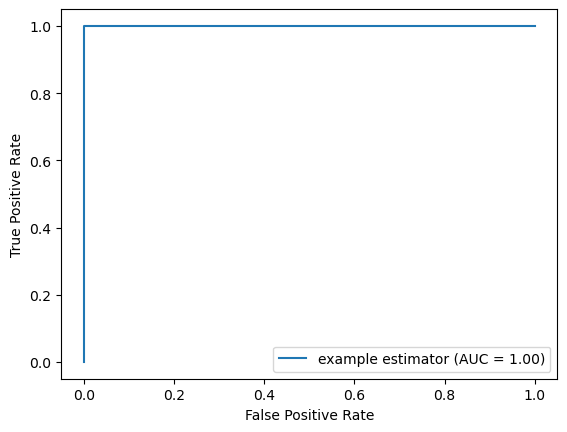

In [15]:
new_model = ten_fold(.1, 10, [5,3,2], X_train_extract60,X_test_extra_60, Y_train_extract60,Y_test_extra_60)

